# What is this Project?

This is my approach on the "Iris Species" classification/clustering dataset.

The objective here is to accurately classify/cluster a plant into 3 possible species, based on its petal and sepal measurements (more on that on the next section).

Dataset original link: https://www.kaggle.com/datasets/uciml/iris

These are the contents of this project:

* Exploratory Data Analysis
* Feature Engineering
* Supervised Modeling:
    * K-Nearest Neighbours (KNN)
    * Support Vector Machine (SVM)
    * Decision Tree
    * Logistic Regression
* Unsupervised Modeling:
    * K-Means


Author: Augusto Gontijo

LinkedIn: https://www.linkedin.com/in/augusto-gontijo/?locale=en_US

GitHub: https://github.com/augusto-gontijo

# About the Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems (http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf), and can also be found on the UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/).

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id </br>
SepalLengthCm </br>
SepalWidthCm </br>
PetalLengthCm </br>
PetalWidthCm </br>
Species

More on: https://www.kaggle.com/datasets/uciml/iris

## What is a petal and a sepal?

Morphologically, both sepals and petals are modified leaves. The calyx (the sepals) and the corolla (the petals) are the outer sterile whorls of the flower, which together form what is known as the perianth

Check out this image for better understanding: https://en.wikipedia.org/wiki/Sepal#/media/File:Petal-sepal.jpg

Source: https://en.wikipedia.org/wiki/Sepal

# Dependencies

This project was developed using:

* Python Version: 3.8.10
* Numpy version: 1.22.2
* Pandas version: 1.4.1
* SKLearn version: 1.0.2
* Seaborn version: 0.11.2
* matplotlib version: 3.5.1

(you might have trouble if trying to use different versions)

# Imports

## Libraries

In [1]:
# Data manipulation libs
import pandas as pd
import numpy as np

# Data visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
sns.set_style('whitegrid')

# Machine Learining libs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans

# Dataset split lib
from sklearn.model_selection import train_test_split

# Cross validation libs:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data

Importing the CSV files.

**Remember to alter the file path to the folder path on your computer**

In [2]:
raw_df = pd.read_csv("C:/... YOUR COMPUTER PATH .../Data/Iris.csv")

# Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

More on: https://en.wikipedia.org/wiki/Exploratory_data_analysis

## Understanding the Data

In this section we'll explore the raw data in order to understand it before modelling.

More on the official data here: https://www.kaggle.com/datasets/uciml/iris

### Data Overview

In [3]:
print("The 'raw' dataset contains {} rows and {} columns.".format(raw_df.shape[0], raw_df.shape[1]))

The 'raw' dataset contains 150 rows and 6 columns.


In [4]:
# Checking out the first 10 rows of the dataset
raw_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Statistical Summary

In [5]:
raw_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Missing Data

Checking for NA (not available) data.

In [6]:
raw_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Types

In [7]:
# Checking the data types:
raw_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Analyzing the Data

### Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. 

Each cell in the table shows the correlation between two variables.

<AxesSubplot:>

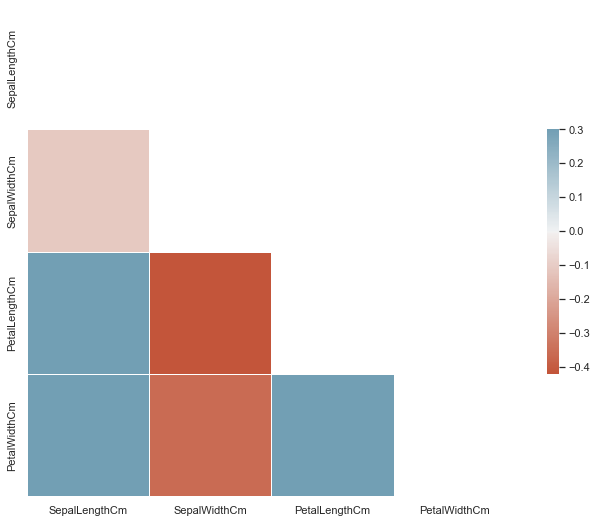

In [8]:
corr_df = raw_df.drop(columns= ['Id'])
corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In the matrix above, the correlation value can vary between -1 (negative correlation), 0 (no correlation) and 1 (positive correlation).

Some observations:

* In general, the variables are weakly correlated in this dataset.
* The most notable correlation occurs between the sepal width and the petal lenght, a negative correlation of -0.4.

### General Analysis (sepal)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

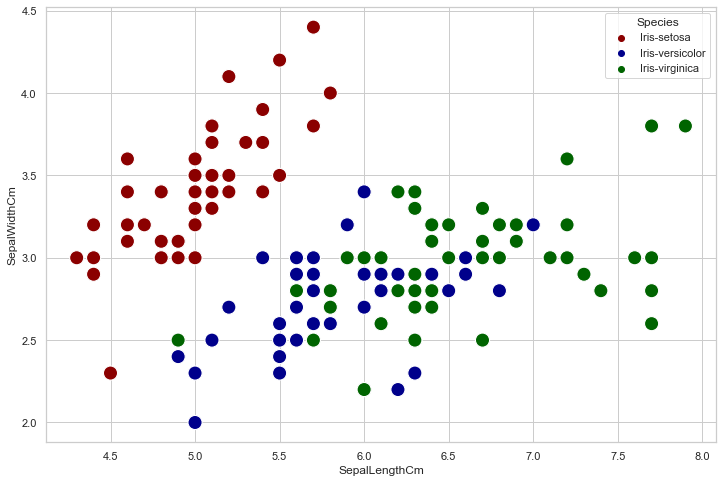

In [9]:
dims = (12, 8)
fig, ax = plt.subplots(figsize = dims)

sns.scatterplot(data = raw_df, 
                x="SepalLengthCm", 
                y="SepalWidthCm",
                ax = ax,
                hue = 'Species',
                palette = {'Iris-setosa': 'darkred',
                           'Iris-versicolor': 'darkblue',
                           'Iris-virginica': 'darkgreen'},
                s=200
                )

On the scatterplot above, we can observe that analyzing only the sepal measurements, the 'setosa' (red) group can be distinguished very easily. The 'versicolor' (blue) and 'virginica' (green) species are more similar.

### General Analysis (petal)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

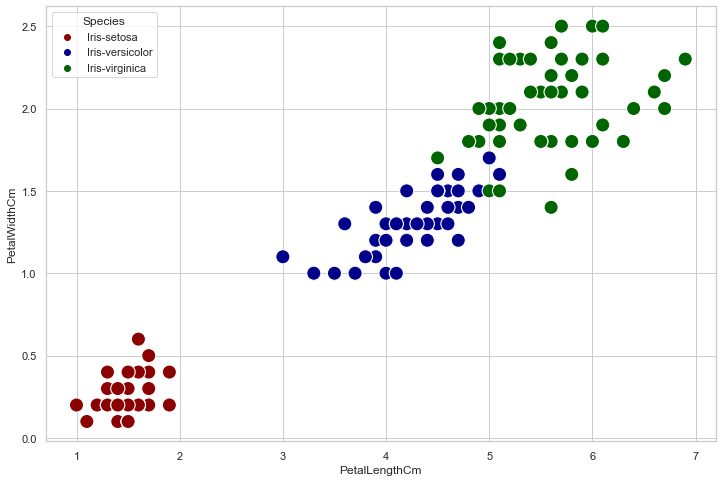

In [10]:
dims = (12, 8)
fig, ax = plt.subplots(figsize = dims)

sns.scatterplot(data = raw_df, 
                x="PetalLengthCm", 
                y="PetalWidthCm",
                ax = ax,
                hue = 'Species',
                palette = {'Iris-setosa': 'darkred',
                           'Iris-versicolor': 'darkblue',
                           'Iris-virginica': 'darkgreen'},
                s=200)

On the scatterplot above, we analyze only the petal measurements, and again the 'setosa' (red) group can be distinguished very easily from the other species. In this petal analysis we can see a more pronouced difference between the 'versicolor' (blue) and 'virginica' (green) species.

### Sepal Length Density

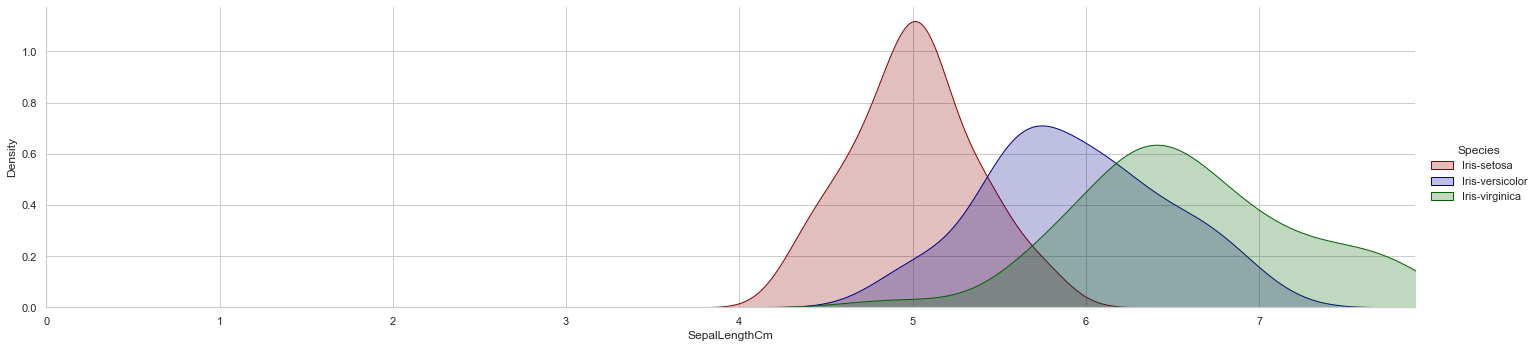

In [11]:
data = raw_df.filter(items = ["SepalLengthCm", "Species"])

facet = sns.FacetGrid(data, 
                      hue = "Species",
                      aspect = 4,
                      height = 5,
                      palette = {'Iris-setosa': 'darkred',
                                 'Iris-versicolor': 'darkblue',
                                 'Iris-virginica': 'darkgreen'}
                      )

facet.map(sns.kdeplot, 'SepalLengthCm', shade = True)
facet.set(xlim=(0, data['SepalLengthCm'].max()))
facet.add_legend()

On the distribution plot above, we can observe a mild distinction of the sepal lenght between the species.

### Sepal Width Density

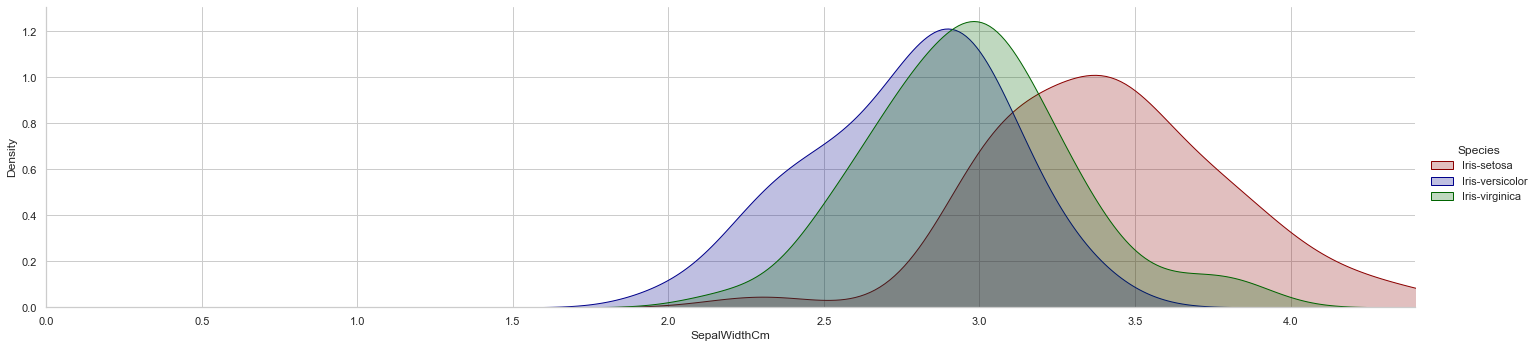

In [12]:
data = raw_df.filter(items = ["SepalWidthCm", "Species"])

facet = sns.FacetGrid(data, 
                      hue = "Species",
                      aspect = 4,
                      height = 5,
                      palette = {'Iris-setosa': 'darkred',
                                 'Iris-versicolor': 'darkblue',
                                 'Iris-virginica': 'darkgreen'}
                      )

facet.map(sns.kdeplot, 'SepalWidthCm', shade = True)
facet.set(xlim=(0, data['SepalWidthCm'].max()))
facet.add_legend()

On the distribution plot above, we can observe a very small distinction of the sepal width between the species.

### Petal Length Density

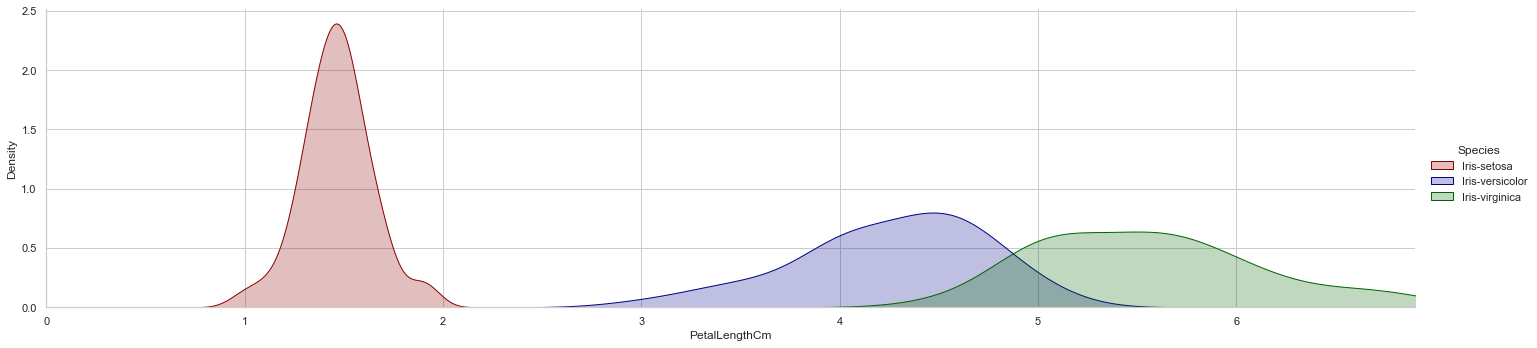

In [13]:
data = raw_df.filter(items = ["PetalLengthCm", "Species"])

facet = sns.FacetGrid(data, 
                      hue = "Species",
                      aspect = 4,
                      height = 5,
                      palette = {'Iris-setosa': 'darkred',
                                 'Iris-versicolor': 'darkblue',
                                 'Iris-virginica': 'darkgreen'}
                      )

facet.map(sns.kdeplot, 'PetalLengthCm', shade = True)
facet.set(xlim=(0, data['PetalLengthCm'].max()))
facet.add_legend()

On the distribution plot above, we can observe a very strong distinction of the petal lenght between the species.

### Petal Width Density

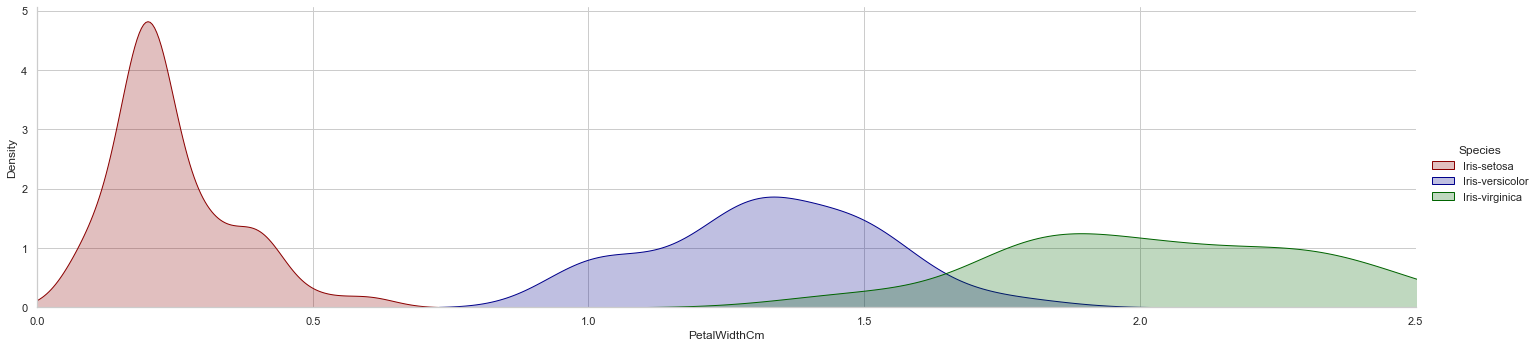

In [14]:
data = raw_df.filter(items = ["PetalWidthCm", "Species"])

facet = sns.FacetGrid(data, 
                      hue = "Species",
                      aspect = 4,
                      height = 5,
                      palette = {'Iris-setosa': 'darkred',
                                 'Iris-versicolor': 'darkblue',
                                 'Iris-virginica': 'darkgreen'}
                      )

facet.map(sns.kdeplot, 'PetalWidthCm', shade = True)
facet.set(xlim=(0, data['PetalWidthCm'].max()))
facet.add_legend()

On the distribution plot above, we can observe a very strong distinction of the petal width between the species.

# Feature Engineering

Feature engineering (or feature extraction) is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

Source: https://en.wikipedia.org/wiki/Feature_engineering

## Removing Id

The 'Id' column won't be useful.

In [15]:
# Removing the 'Id' column
df = raw_df.drop(columns = ['Id'])

# Checking the dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Converting targets to numeric

In this section we'll convert the 'Species' values to numeric, using the following schema:

* 'Iris-setosa': 0
* 'Iris-versicolor': 1
* 'Iris-virginica': 2

In [16]:
# Replacing string targets to numerical
df = df.replace({'Iris-setosa': 0,
                 'Iris-versicolor': 1,
                 'Iris-virginica': 2})

# Casting the new converted values into integer
df['Species'] = df['Species'].astype(int)

# Checking the final dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Checking the final dataset data types
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

# Building the Model

In this section we'll build the ML models, using the following techniques:

* Train/Test Split
* Supervised Modeling:
    * K-Nearest Neighbours (KNN)
    * Support Vector Machine (SVM)
    * Decision Tree
    * Logistic Regression
* Unsupervised Modeling:
    * K-Means

## Train / Test split

Now we'll split our dataset and select which features will be used in the model.

In [18]:
# Setting the seed:
np.random.seed(66)

# Setting the 'X' dataset (without the target):
X = df.drop(columns = ['Species'])

# Setting the 'y' dataset (only the target):
y = df['Species']

# Splitting the data into train and test sets, with 70% for train and 30% for test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [19]:
print("The X_train dataset contains {} rows and {} columns.".format(X_train.shape[0], X_train.shape[1]))
print("The y_train dataset contains {} rows. \n".format(y_train.shape[0]))
print("The X_test dataset contains {} rows and {} columns.".format(X_test.shape[0], X_test.shape[1]))
print("The y_test dataset contains {} rows.".format(y_test.shape[0]))

The X_train dataset contains 105 rows and 4 columns.
The y_train dataset contains 105 rows. 

The X_test dataset contains 45 rows and 4 columns.
The y_test dataset contains 45 rows.


In [20]:
# Checking if the training target dataset is well balanced:
pd.DataFrame(y_train.value_counts())

,Species
2,35
0,35
1,35


In [21]:
# Checking if the test target dataset is well balanced:
pd.DataFrame(y_test.value_counts())

,Species
0,15
2,15
1,15


## Supervised Modeling

### K-Nearest Neighbours (KNN)

In [22]:
# Creating KNN instance 
KNN = KNeighborsClassifier()

# Setting the cross validation method
kfold = StratifiedKFold(n_splits = 10)

# Creating a dict with some parameters
knn_param_grid = {"n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsKNN = GridSearchCV(KNN,
                     param_grid = knn_param_grid, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1)

# Fitting the Grid Search with our data
gsKNN.fit(X_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
KNN_best = gsKNN.best_estimator_

# Getting the best accuracy score
KNN_score = (gsKNN.best_score_ * 100).round(2)

# Printing the best score
print("KNN best score: {}%".format(KNN_score))

Fitting 10 folds for each of 15 candidates, totalling 150 fits
KNN best score: 98.09%


### Support Vector Machine (SVM)

In [23]:
# Creating SVM instance 
SVM = svm.SVC(probability=True)

# Setting the cross validation method
kfold = StratifiedKFold(n_splits = 10)

# Creating a dict with some parameters
svm_param_grid = {'C': [0.1, 1, 10, 100], 
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsSVM = GridSearchCV(SVM,
                     param_grid = svm_param_grid, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1)

# Fitting the Grid Search with our data
gsSVM.fit(X_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
SVM_best = gsSVM.best_estimator_

# Getting the best accuracy score
SVM_score = (gsSVM.best_score_ * 100).round(2)

# Printing the best score
print("SVM best score: {}%".format(SVM_score))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
SVM best score: 98.09%


### Decision Tree

In [24]:
# Creating Decision Tree instance 
DTC = DecisionTreeClassifier()

# Setting the cross validation method
kfold = StratifiedKFold(n_splits = 10)

# Creating a dict with some parameters
dtc_param_grid = {"max_depth": [2, 4, 6, 8, 10, 12],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],              
              "criterion": ['gini', 'entropy']}

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsDTC = GridSearchCV(DTC,
                     param_grid = dtc_param_grid, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1)

# Fitting the Grid Search with our data
gsDTC.fit(X_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
DTC_best = gsDTC.best_estimator_

# Getting the best accuracy score
DTC_score = (gsDTC.best_score_ * 100).round(2)

# Printing the best score
print("Decision Tree best score: {}%".format(DTC_score))

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Decision Tree best score: 98.09%


### Logistic Regression

In [25]:
# Creating Logistic Regression instance 
LRC = LogisticRegression()

# Setting the cross validation method
kfold = StratifiedKFold(n_splits = 10)

# Creating a dict with some parameters
lrc_params = {'penalty': ['l1', 'l2'],
              'C': np.logspace(-4, 4, 50),
              'max_iter': [100, 200, 300],
              'fit_intercept': [True, False]
             }

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsLRC = GridSearchCV(LRC,
                     param_grid = lrc_params, 
                     cv = kfold, 
                     scoring = "accuracy", 
                     n_jobs = 4, 
                     verbose = 1)

# Fitting the Grid Search with our data
gsLRC.fit(X_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
LRC_best = gsLRC.best_estimator_

# Getting the best accuracy score
LRC_score = (gsLRC.best_score_ * 100).round(2)

# Printing the best score
print("Logistic Regression best score: {}%".format(LRC_score))

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Logistic Regression best score: 96.27%


### Comparing the Results

In [26]:
# Creating a result dataframe containing the average scores:
result_df = pd.DataFrame({
    "Model": ["K-Nearest Neighbours (KNN)", "Support Vector Machine (SVM)", "Decision Tree", "Logistic Regression"],
    "Best Score": [KNN_score, SVM_score, DTC_score, LRC_score]
})

# Sorting the average scores:
result_df.sort_values(by='Best Score', ascending=False)

,Model,Best Score
0,K-Nearest Neighbours (KNN),98.09
1,Support Vector Machine (SVM),98.09
2,Decision Tree,98.09
3,Logistic Regression,96.27


As we can se on the heatmap below, the prediction results of all models are highly correlated (above 0.9)

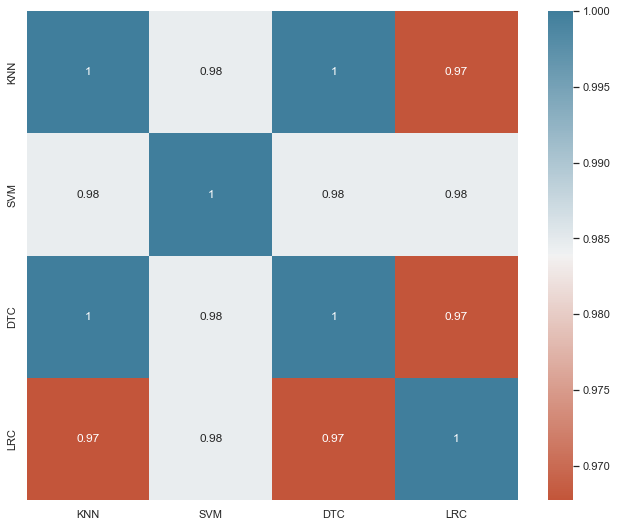

In [27]:
# Creating a pandas Series with the predictions of each classifier:
test_KNN = pd.Series(KNN_best.predict(X_test), name="KNN")
test_SVM = pd.Series(SVM_best.predict(X_test), name="SVM")
test_DTC = pd.Series(DTC_best.predict(X_test), name="DTC")
test_LRC = pd.Series(LRC_best.predict(X_test), name="LRC")

# Concatenating all classifier results
classifier_results = pd.concat([test_KNN, test_SVM, test_DTC, test_LRC], axis = 1)

# Replacing results to numbers
classifier_results.replace({'Iris-setosa': 0,
                            'Iris-versicolor': 1,
                            'Iris-virginica': 2},
                            inplace=True)

# Casting the columns as integer
classifier_results = classifier_results.astype({'KNN': int,
                                                'SVM': int,
                                                'DTC': int,
                                                'LRC': int})

# Creating a correlation between the results of each classifier
classifier_corr = classifier_results.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap = True)

# Plotting the heatmap showing the correlation between results of all 5 classifiers
g = sns.heatmap(classifier_corr,
               annot=True,
               ax = ax, 
               cmap = cmap)

### Ensemble Modeling

Now we'll use the 'VotingClassifier' to use the best model of each estimator (KNN, SVM, DTC and LRC) and make a new prediction based on the combined (and voted) results of each one.

In [28]:
voting_classifier = VotingClassifier(estimators=[('knn', KNN_best),
                                                 ('svm', SVM_best),
                                                 ('dtc', DTC_best),                                                  
                                                 ('lrc', LRC_best)], 
                           voting = 'soft', 
                           n_jobs = 4)

votingC = voting_classifier.fit(X_train, y_train)

# Predicting the test dataset
test_predict = pd.Series(voting_classifier.predict(X_test), name = "predicted_Species")

In [29]:
# Joining the test dataset with test Species and predicted Species
results = pd.concat([X_test.reset_index(drop=True), 
                     y_test.reset_index(drop=True), 
                     test_predict],
                     axis = 1)

# Converting Species back to text
results['Species'] = results['Species'].replace({0: 'Iris-setosa',
                                                 1: 'Iris-versicolor',
                                                 2: 'Iris-virginica'})

# Converting predicted_Species back to text
results['predicted_Species'] = results['predicted_Species'].replace({0: 'Iris-setosa',
                                                                     1: 'Iris-versicolor',
                                                                     2: 'Iris-virginica'})

# Querying the predicted dataset to show only errors
results.query("Species != predicted_Species")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted_Species
15,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica


## Unsupervised Modeling

### K-Means

In [30]:
data = df.drop(columns = ['Species']).values

wCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10)
    kmeans.fit(data)
    wCSS.append(kmeans.inertia_)

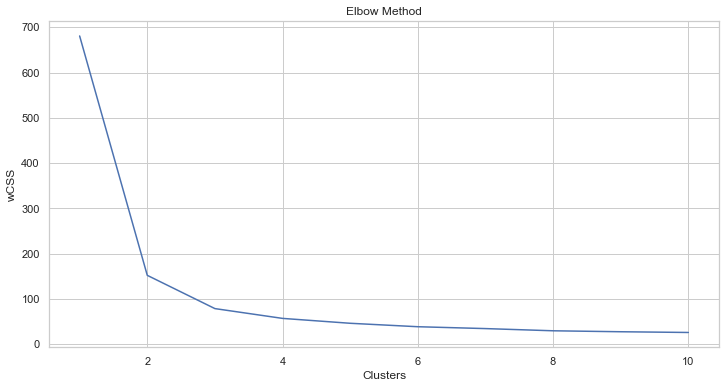

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(range(1,11), wCSS)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wCSS')
plt.show()

The 'Elbow Method' show us that the ideal amount of clusters is 3. (But we already knew that the original dataset contains 3 species)

In [32]:
# Creating KMeans instance
kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 66)

# Fitting and prediction the clusters
y_kmeans = kmeans.fit_predict(data)

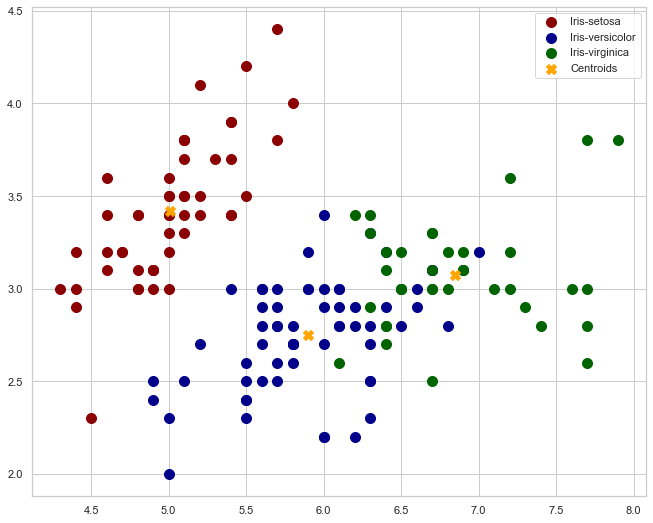

In [33]:
fig, ax = plt.subplots(figsize=(11, 9))

# Plotting the clusters
ax.scatter(data[y_kmeans == 0, 0], 
            data[y_kmeans == 0, 1], 
            s = 100, 
            c = 'darkred', 
            label = 'Iris-setosa')

ax.scatter(data[y_kmeans == 1, 0], 
            data[y_kmeans == 1, 1], 
            s = 100, 
            c = 'darkblue', 
            label = 'Iris-versicolor')

ax.scatter(data[y_kmeans == 2, 0], 
            data[y_kmeans == 2, 1], 
            s = 100, 
            c = 'darkgreen', 
            label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, 
            c = 'orange', 
            label = 'Centroids',
            marker='X')

plt.legend()

In [34]:
# Converting the prediction into a pandas series
y_kmeans = pd.Series(y_kmeans, name = "predicted_Species")

# Joining the prediction with the original dataframe
results = pd.concat([df.reset_index(drop=True), 
                     y_kmeans.reset_index(drop=True)],
                     axis = 1)

In [35]:
# Converting Species back to text
results['Species'].replace({0: 'Iris-setosa',
                            1: 'Iris-versicolor',
                            2: 'Iris-virginica'},
                            inplace=True)

# Converting predicted_Species back to text                                                 
results['predicted_Species'].replace({0: 'Iris-setosa',
                                      1: 'Iris-versicolor',
                                      2: 'Iris-virginica'},
                                      inplace=True)

In [36]:
# Querying the predicted dataset to show only errors
results.query("Species != predicted_Species")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted_Species
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica,Iris-versicolor
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor
121,5.6,2.8,4.9,2.0,Iris-virginica,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica,Iris-versicolor
126,6.2,2.8,4.8,1.8,Iris-virginica,Iris-versicolor


# Final Thoughts

On this project we used supervised and unsupervised learning to classify/cluster each flower into a group (species). Here are some observations:

* The 'setosa' species is much different from the others (we saw that on the EDA). Therefore, in both supervised and unsupervised methods all 'setosa' flowers were correctly classified.
* The 'versicolor' and 'virginica' species have quite similar sepal measurements. This makes it harder for the models to distinguish them.
* Overall, the supervised method delivered better results than the unsupervised method.